In [1]:
from skimage import data, filters, measure
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

In [2]:
image = data.human_mitosis()
# plt.imshow(image, cmap='gray')

In [3]:
def featureExtraction(image):
    thresholded = filters.threshold_otsu(image)
    binary_image = image > thresholded
    label_image = measure.label(binary_image)
    # new_image = cle.imshow(label_image, labels=True)
    results = measure.regionprops_table(image, label_image, properties = ['mean_intensity', 'area', 'perimeter', 'orientation', 
                                                               'axis_major_length', 'axis_minor_length'])
    df = pd.DataFrame(results)
    new_df = df[['orientation', 'area']]
    df_fig = sns.scatterplot(data=new_df, x= new_df['area'], y=new_df['orientation'])
    return df_fig

<AxesSubplot: xlabel='area', ylabel='orientation'>

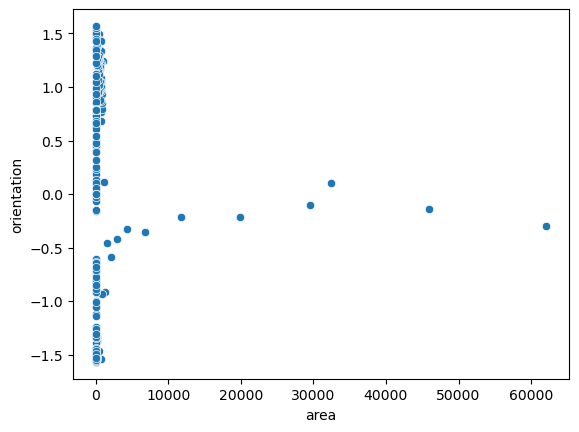

In [4]:
featureExtraction(image)